In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed = 100      # Seed number
F = 1e-4        # Body force
L = 1e-3        # Characteristic length
niu = 1e-6      # Kinematic viscosity
samples = 51    # Samples in channel

In [3]:
time = [0.0225, 0.045, 0.1125, 0.225, 10000]
channel_points = np.linspace(0.0, L, samples)
vx = []
for t in time:
    vx_t = []
    for y in np.nditer(channel_points):
        summation = 0.0
        for n in range(0, seed):
            summation += ((4.0 * F * np.power(L ,2) / (niu * np.power(np.pi, 3) * np.power(2*n+1, 3))) 
                        * np.sin(np.pi * y * (2*n+1) / L) 
                        * np.exp(-np.power((2*n+1), 2) * np.power(np.pi, 2) * niu * t / (np.power(L ,2))))
        # print(summation)
        result = -F * y * (y - L) / (2 * niu) - summation
        vx_t.append(result)
    vx.append(vx_t)
vx = np.array(vx)

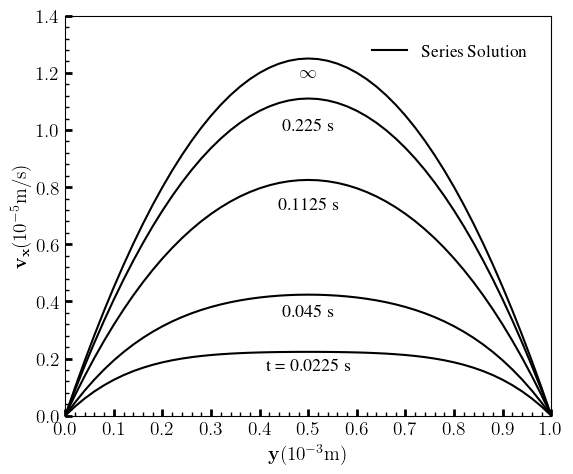

In [4]:
# Set the figure size
plt.figure(figsize=(6, 5))

# Turn on LaTeX if the latex is on
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{times}"
plt.rcParams['font.family'] = "Times New Roman"

plt.plot(1000*channel_points, 1e5*vx[0], linestyle="-", color='black', label = 'Series Solution')
plt.plot(1000*channel_points, 1e5*vx[1], linestyle="-", color='black')
plt.plot(1000*channel_points, 1e5*vx[2], linestyle="-", color='black')
plt.plot(1000*channel_points, 1e5*vx[3], linestyle="-", color='black')
plt.plot(1000*channel_points, 1e5*vx[4], linestyle="-", color='black')

# Set the title of series
plt.text(0.5, 0.16,  't = 0.0225 s', fontsize=13, color='black', ha='center')
plt.text(0.5, 0.35,  '0.045 s',      fontsize=13, color='black', ha='center')
plt.text(0.5, 0.725, '0.1125 s',     fontsize=13, color='black', ha='center')
plt.text(0.5, 1.0,   '0.225 s',      fontsize=13, color='black', ha='center')
plt.text(0.5, 1.185,  r'$\infty$',   fontsize=13, color='black', ha='center')

# Set the tile of axes
plt.xlabel(r'$\mathrm{\mathbf{y} (10^{-3}m)}$',       fontsize=14)
plt.ylabel(r'$\mathrm{\mathbf{v_{x}} (10^{-5}m/s)}$', fontsize=14)

# Tick styles and aranges
plt.xticks(np.arange(0.0, 1.01, 0.1), fontsize=14)
plt.yticks(np.arange(0.0, 1.41, 0.2), fontsize=14)

# Minor tick styles and aranges
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.04))

# Set the size and position of major and minor ticks
plt.tick_params(axis='both', length=5, width=2, direction="in")
plt.tick_params(axis='both', which='minor', length=3, width=1, direction="in")

# Set the starting and ending position of axes
plt.xlim([0, 1.0])
plt.ylim([0, 1.4])

# Set the styles of axes line
bwidth = 1.25
plt.rcParams["axes.linewidth"] = bwidth

# Set the legend on
plt.legend()
plt.legend(prop={"size":12.5}, frameon=False, edgecolor='k', bbox_to_anchor=(0.6, 0.85))

# Set the filling range
plt.subplots_adjust(left=0.14,right=0.95,top=0.95,bottom=0.15)

plt.savefig("my_plot.svg")
plt.show()